In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image

In [82]:
mortality_ca = pd.read_csv("Resources/mortality_2006_2010_clean.csv")
pollution_ca = pd.read_csv("Resources/pollution_2006_2010.csv")

In [83]:
diseases = mortality_ca["ICD-10 113 Cause List"].unique().tolist()
print(diseases, len(diseases))

['Influenza and pneumonia (J09-J18)', 'Pneumonia (J12-J18)', 'Chronic lower respiratory diseases (J40-J47)', 'Bronchitis, chronic and unspecified (J40-J42)', 'Emphysema (J43)', 'Asthma (J45-J46)', 'Other chronic lower respiratory diseases (J44,J47)', 'Pneumonitis due to solids and liquids (J69)', 'Other diseases of respiratory system (J00-J06,J30- J39,J67,J70-J98)', 'Influenza (J09-J11)'] 10


In [84]:
counties_list = pollution_ca["County"].unique().tolist()
print(counties_list, len(counties_list))

['Contra Costa', 'Humboldt', 'Imperial', 'Los Angeles', 'Orange', 'Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara', 'Santa Cruz', 'Solano', 'Alameda', 'Fresno', 'Santa Clara'] 16


In [86]:
clrd_mortality = mortality_ca[mortality_ca["ICD-10 113 Cause List"] == 
                                         "Chronic lower respiratory diseases (J40-J47)"]
# clrd_mortality.head()

In [87]:
grouped_clrd = clrd_mortality.groupby(["County", "Year"])["Deaths"].agg([np.sum])
grouped_clrd1 = grouped_clrd.rename(columns={"sum": "Death"})
grouped_clrd1

Death
County  Year       
Alameda 2006  422.0
        2007  405.0
        2008  455.0
        2009  419.0
        2010  399.0
...             ...
Solano  2006  143.0
        2007  127.0
        2008  125.0
        2009  137.0
        2010  163.0

[80 rows x 1 columns]

In [88]:
pollutants_sd = pollution_ca[pollution_ca["County"] == "San Diego"]
# pollutants_cc

In [89]:
no2_pollutants_sd = pollutants_sd.groupby(["County", "Year"])["NO2 AQI"].agg([np.sum])
no2_pollutants_sd1 = no2_pollutants_sd.rename(columns={"sum": "NO2 AQI"})
no2_pollutants_sd1

NO2 AQI
County    Year         
San Diego 2006   150330
          2007   134570
          2008   138004
          2009   132388
          2010    45028

In [90]:
clrd_deaths_sd = grouped_clrd1.filter(like="San Diego", axis=0)
clrd_deaths_sd

Death
County    Year        
San Diego 2006  1040.0
          2007  1017.0
          2008  1049.0
          2009   949.0
          2010  1060.0

In [91]:
sd_merged = pd.merge(no2_pollutants_sd1, clrd_deaths_sd, on="Year")
sd_merged1 = sd_merged.reset_index()
sd_merged2 = sd_merged1.rename(columns={"Death": "San Diego"})
sd_merged2

,Year,NO2 AQI,San Diego
0,2006,150330,1040.0
1,2007,134570,1017.0
2,2008,138004,1049.0
3,2009,132388,949.0
4,2010,45028,1060.0


In [92]:
def line_plots(s):
    x = s["Year"]
    y1 = s[s.columns[1]] 
    y2 = s[s.columns[2]]
    fig, ax = plt.subplots()
    ax.plot(x, y1, color="blue", marker="o")

    ax2 = ax.twinx()
    ax2.plot(x, y2, color="red", marker="o")

    ax.xaxis.set_ticks(x)
    ax.set_xlabel("Year")
    ax.set_ylabel(f"Total {s.columns[1]}")
    ax2.set_ylabel("Number of Deaths")

    red_patch = mpatches.Patch(color="blue", label=s.columns[1])
    blue_patch = mpatches.Patch(color="red", label="Deaths")
    plt.legend(handles=[red_patch, blue_patch], loc="best")

    plt.title(f"""
    Number of Chronic Lower Respiratory Diseases Deaths in {s.columns[2]} 
    vs Total {s.columns[1]} (Air Qualitity Index) | 2006-2010
    """)
    plt.show()
    plt.tight_layout()

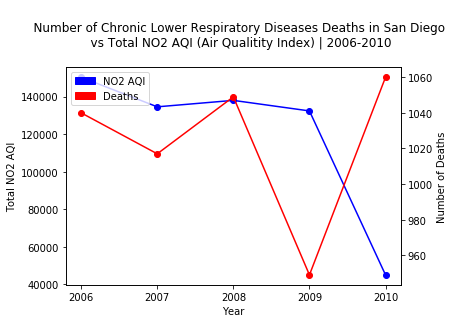

<Figure size 432x288 with 0 Axes>

In [93]:
line_plots(sd_merged2)

In [65]:
# 'Contra Costa', 'Humboldt', 'Imperial', 'Los Angeles', 'Orange', 'Riverside', 
# 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara', 'Santa Cruz', 
# 'Solano', 'Alameda', 'Fresno', 'Santa Clara'

In [94]:
o3_pollutants_sd = pollutants_sd.groupby(["County", "Year"])["O3 AQI"].agg([np.sum])
o3_pollutants_sd1 = o3_pollutants_sd.rename(columns={"sum": "O3 AQI"})
o3_pollutants_sd1

O3 AQI
County    Year        
San Diego 2006  148874
          2007  147760
          2008  144516
          2009  146180
          2010   46902

In [95]:
sd_merged_o3 = pd.merge(o3_pollutants_sd1, clrd_deaths_sd, on="Year")
sd_merged_o3_1 = sd_merged_o3.reset_index()
sd_merged_o3_2 = sd_merged_o3_1.rename(columns={"Death": "San Diego"})
sd_merged_o3_2

,Year,O3 AQI,San Diego
0,2006,148874,1040.0
1,2007,147760,1017.0
2,2008,144516,1049.0
3,2009,146180,949.0
4,2010,46902,1060.0


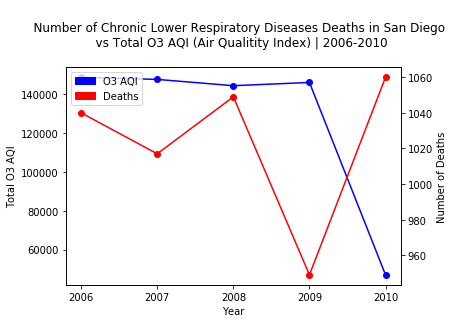

<Figure size 432x288 with 0 Axes>

In [96]:
line_plots(sd_merged_o3_2)

In [97]:
so2_pollutants_sd = pollutants_sd.groupby(["County", "Year"])["SO2 AQI"].agg([np.sum])
so2_pollutants_sd1 = so2_pollutants_sd.rename(columns={"sum": "SO2 AQI"})
so2_pollutants_sd1

SO2 AQI
County    Year         
San Diego 2006  18445.0
          2007  13383.0
          2008  12300.0
          2009  12628.0
          2010   1456.0

In [102]:
sd_merged_so2 = pd.merge(so2_pollutants_sd1, clrd_deaths_sd, on="Year")
sd_merged_so2_1 = sd_merged_so2.reset_index()
sd_merged_so2_2 = sd_merged_so2_1.rename(columns={"Death": "San Diego"})
sd_merged_so2_2

,Year,SO2 AQI,San Diego
0,2006,18445.0,1040.0
1,2007,13383.0,1017.0
2,2008,12300.0,1049.0
3,2009,12628.0,949.0
4,2010,1456.0,1060.0


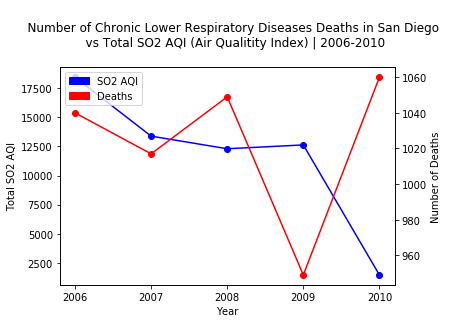

<Figure size 432x288 with 0 Axes>

In [103]:
line_plots(sd_merged_so2_2)

In [99]:
co_pollutants_sd = pollutants_sd.groupby(["County", "Year"])["CO AQI"].agg([np.sum])
co_pollutants_sd1 = co_pollutants_sd.rename(columns={"sum": "CO AQI"})
co_pollutants_sd1

CO AQI
County    Year         
San Diego 2006  24862.0
          2007  22566.0
          2008  21940.0
          2009  20994.0
          2010   7014.0

In [104]:
sd_merged_co = pd.merge(co_pollutants_sd1, clrd_deaths_sd, on="Year")
sd_merged_co_1 = sd_merged_co.reset_index()
sd_merged_co_2 = sd_merged_co_1.rename(columns={"Death": "San Diego"})
sd_merged_co_2

,Year,CO AQI,San Diego
0,2006,24862.0,1040.0
1,2007,22566.0,1017.0
2,2008,21940.0,1049.0
3,2009,20994.0,949.0
4,2010,7014.0,1060.0


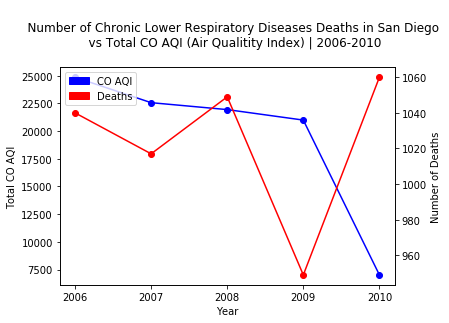

<Figure size 432x288 with 0 Axes>

In [105]:
line_plots(sd_merged_co_2)